# Unzip files

In [ ]:
import zipfile
import os
import shutil
import glob
import pandas as pd
import numpy as np

def unzip_files(zip_file_path):

  destination_folder = zip_file_path.split('.zip')[0]

  # Create the destination folder if it doesn't exist
  if not os.path.exists(destination_folder):
      os.makedirs(destination_folder)

  # Open the zip file
  with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
      # Extract all contents to the destination folder
      zip_ref.extractall(destination_folder)

  print(f"Contents of '{zip_file_path}' extracted to '{destination_folder}'.")

In [ ]:
unzip_files('audio.zip')

Contents of 'audio.zip' extracted to 'audio'.


# Compute SECS between ground truth audios

In [ ]:
!pip install resemblyzer
from resemblyzer import VoiceEncoder, preprocess_wav
from pathlib import Path

encoder = VoiceEncoder()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

Loaded the voice encoder model on cpu in 0.04 seconds.


In [ ]:
import pandas as pd
metadata_df = pd.read_csv('ALL_METADATA_TTS.csv')
metadata_df

,Model,Dataset,Reference audio path,Audio path,Speaker ID,Duration reference audio,Duration audio,RTF GPU,RTF CPU,SECS,...,Evaluator 4 Sim-OS,Evaluator 5 OS,Evaluator 5 Sim-OS,Evaluator 6 OS,Evaluator 6 Sim-OS,Evaluator 7 OS,Evaluator 7 Sim-OS,Evaluator 8 OS,Evaluator 8 Sim-OS,MOSNet
0,YourTTS,Spanish,audio/Spanish/locutor2_audio_364.wav,synthesized_audios/YourTTS/Spanish/locutor2_au...,locutor2,1.578957,5.429333,0.589072,5.266547,0.811396,...,2.0,NaN,1.0,NaN,1.0,2.0,2.0,2.0,NaN,3.413
1,YourTTS,Spanish,audio/Spanish/locutor2_audio_15215_15216.wav,synthesized_audios/YourTTS/Spanish/locutor2_au...,locutor2,6.269388,3.754667,0.088459,0.791379,0.862939,...,NaN,NaN,2.0,2.0,NaN,2.0,3.0,2.0,NaN,3.051
2,YourTTS,Spanish,audio/Spanish/locutor2_audio_29797.wav,synthesized_audios/YourTTS/Spanish/locutor2_au...,locutor2,5.421859,6.645333,0.088006,0.717888,0.843910,...,1.0,1.0,1.0,1.0,1.0,2.0,NaN,2.0,2.0,2.849
3,YourTTS,Spanish,audio/Spanish/locutor2_audio_7682.wav,synthesized_audios/YourTTS/Spanish/locutor2_au...,locutor2,2.925714,9.578667,0.022994,0.195951,0.902871,...,2.0,NaN,NaN,1.0,2.0,2.0,1.0,1.0,1.0,3.221
4,YourTTS,Spanish,audio/Spanish/locutor2_audio_18383.wav,synthesized_audios/YourTTS/Spanish/locutor2_au...,locutor2,2.240726,8.853333,0.024146,0.225055,0.793174,...,2.0,NaN,NaN,2.0,2.0,1.0,4.0,2.0,NaN,2.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,TorToise,test,audio/test/1320_122612_000007_000001.wav,synthesized_audios/TorToise/test/1320_122612_0...,1320,4.760000,3.286000,11.847371,111.281342,0.804698,...,4.0,NaN,5.0,5.0,NaN,4.0,4.0,5.0,5.0,3.642
1367,TorToise,test,audio/test/1320_122612_000030_000002.wav,synthesized_audios/TorToise/test/1320_122612_0...,1320,9.150000,5.942000,10.663784,97.242127,0.774758,...,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,5.0,3.934
1368,TorToise,test,audio/test/1320_122612_000035_000006.wav,synthesized_audios/TorToise/test/1320_122612_0...,1320,4.870000,6.678000,12.511632,108.047729,0.758548,...,4.0,4.0,3.0,4.0,4.0,4.0,3.0,NaN,4.0,2.952
1369,TorToise,test,audio/test/1320_122612_000040_000001.wav,synthesized_audios/TorToise/test/1320_122612_0...,1320,3.800083,5.152667,11.560384,104.348067,0.801076,...,NaN,4.0,4.0,NaN,4.0,NaN,5.0,5.0,NaN,3.875


In [ ]:
metadata_df_real_audios = metadata_df[metadata_df['Model'] == 'Ground truth']

In [ ]:
def prepare_audios(original_directory, new_directory):

  # Create the new directory if it doesn't exist
  if not os.path.exists(new_directory):
      os.makedirs(new_directory)

  # Iterate through files in the original directory
  for filename in os.listdir(original_directory):
      if filename.endswith('.wav'):
          # Extract speaker information from the filename
          speaker = filename.split('_')[0]

          # Create speaker directory in the new directory if it doesn't exist
          speaker_directory = os.path.join(new_directory, speaker)
          if not os.path.exists(speaker_directory):
              os.makedirs(speaker_directory)

          # Copy the file to the corresponding speaker directory in the new directory
          original_file_path = os.path.join(original_directory, filename)
          new_file_path = os.path.join(speaker_directory, filename)
          shutil.copy(original_file_path, new_file_path)


In [ ]:
for dataset in os.listdir('audio'):

  path = os.path.join('audio', dataset)
  if not os.path.isfile(path):

    prepare_audios(path, os.path.join('audios_prepared', dataset))

In [ ]:
import random

for index, row in metadata_df_real_audios.iterrows():
  audio_path = row['Audio path']
  directory = os.path.join('audios_prepared', row['Dataset'], row['Speaker ID'])
  reference_audio_path = os.path.join(directory, random.choice(os.listdir(directory)))

  audio_fpath = Path(audio_path)
  audio_wav = preprocess_wav(audio_fpath)
  audio_embed = encoder.embed_utterance(audio_wav)

  reference_audio_fpath = Path(reference_audio_path)
  reference_audio_wav = preprocess_wav(reference_audio_fpath)
  reference_audio_embed = encoder.embed_utterance(reference_audio_wav)

  SECS =  audio_embed @ reference_audio_embed

  metadata_df.loc[index, 'SECS'] = SECS

metadata_df[metadata_df['Model'] == 'Ground truth']

,Model,Dataset,Reference audio path,Audio path,Speaker ID,Duration reference audio,Duration audio,RTF GPU,RTF CPU,SECS,...,Evaluator 4 Sim-OS,Evaluator 5 OS,Evaluator 5 Sim-OS,Evaluator 6 OS,Evaluator 6 Sim-OS,Evaluator 7 OS,Evaluator 7 Sim-OS,Evaluator 8 OS,Evaluator 8 Sim-OS,MOSNet
274,Ground truth,test,NaN,audio/test/1089_134691_000013_000004.wav,1089,NaN,5.420000,NaN,NaN,1.000000,...,5.0,5.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,3.915
275,Ground truth,test,NaN,audio/test/1089_134691_000013_000002.wav,1089,NaN,1.190000,NaN,NaN,0.690187,...,NaN,5.0,4.0,5.0,5.0,4.0,NaN,NaN,5.0,3.308
276,Ground truth,test,NaN,audio/test/1089_134691_000008_000001.wav,1089,NaN,10.680000,NaN,NaN,0.856499,...,3.0,5.0,NaN,5.0,5.0,4.0,5.0,NaN,3.0,3.668
277,Ground truth,test,NaN,audio/test/1089_134691_000026_000002.wav,1089,NaN,1.450042,NaN,NaN,0.713837,...,5.0,5.0,4.0,NaN,5.0,4.0,5.0,5.0,5.0,3.881
278,Ground truth,test,NaN,audio/test/1089_134691_000044_000001.wav,1089,NaN,4.870000,NaN,NaN,0.880151,...,5.0,NaN,5.0,NaN,5.0,5.0,NaN,NaN,4.0,3.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Ground truth,Spanish,NaN,audio/Spanish/locutor6_audio_30761.wav,locutor6,NaN,4.272472,NaN,NaN,0.827809,...,3.0,5.0,5.0,NaN,1.0,5.0,5.0,5.0,NaN,3.113
887,Ground truth,Spanish,NaN,audio/Spanish/locutor6_audio_29712.wav,locutor6,NaN,1.555737,NaN,NaN,0.827573,...,5.0,NaN,5.0,NaN,3.0,5.0,NaN,5.0,3.0,4.184
888,Ground truth,Spanish,NaN,audio/Spanish/locutor6_audio_18798.wav,locutor6,NaN,7.697415,NaN,NaN,0.965655,...,5.0,5.0,5.0,NaN,5.0,5.0,5.0,5.0,NaN,2.949
889,Ground truth,Spanish,NaN,audio/Spanish/locutor6_audio_33235.wav,locutor6,NaN,2.519365,NaN,NaN,0.828497,...,5.0,NaN,NaN,5.0,NaN,5.0,5.0,5.0,5.0,4.223


# Create table results

In [ ]:
import re

columns = metadata_df.columns
pattern = re.compile(r'Evaluator \d+ OS')
os_columns = [column for column in columns if pattern.search(column)]
metadata_df['MOS'] = metadata_df[os_columns].mean(axis=1)

columns = metadata_df.columns
pattern = re.compile(r'Evaluator \d+ Sim-OS')
os_columns = [column for column in columns if pattern.search(column)]
metadata_df['Sim-MOS'] = metadata_df[os_columns].mean(axis=1)

In [ ]:
import numpy as np

metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'MOSNet', 'Sim-MOS']

results_df = pd.DataFrame({'Model': ['Ground truth', 'Ground truth', 'Ground truth',
                                    'TorToise', 'TorToise',
                                    'XTTS', 'XTTS', 'XTTS',
                                    'YourTTS', 'YourTTS', 'YourTTS'],
                          'Dataset': ['Spanish', 'test', 'train',
                                      'test', 'train',
                                      'Spanish', 'test', 'train',
                                      'Spanish', 'test', 'train']
                           })

for metric in metrics_list:
  grouped_df = metadata_df.groupby(['Model', 'Dataset'])[metric]
  mean = grouped_df.mean()
  n = grouped_df.count()
  error = grouped_df.std() / np.sqrt(n)

  result = [str(round(mean[i], 3)) + ' +- ' + str(round(error[i], 3)) for i in range(len(mean))]

  results_df[metric] = result

results_df
# ESTO ES SIN TENER EN CUENTA OUTLIERS!
# AL FINAL DEL NOTEBOOK VUELVO A HACER EL CÁLCULO QUITANDO OUTLIERS

,Model,Dataset,RTF GPU,RTF CPU,SECS,WER,MOS,MOSNet,Sim-MOS
0,Ground truth,Spanish,nan +- nan,nan +- nan,0.843 +- 0.008,0.345 +- 0.235,4.876 +- 0.012,3.432 +- 0.043,4.109 +- 0.053
1,Ground truth,test,nan +- nan,nan +- nan,0.815 +- 0.01,0.105 +- 0.022,4.617 +- 0.041,3.741 +- 0.047,4.439 +- 0.04
2,Ground truth,train,nan +- nan,nan +- nan,0.818 +- 0.01,0.065 +- 0.01,4.782 +- 0.017,3.421 +- 0.051,4.395 +- 0.043
3,TorToise,test,11.413 +- 0.063,99.139 +- 0.798,0.774 +- 0.008,0.07 +- 0.01,4.144 +- 0.031,3.644 +- 0.043,3.97 +- 0.038
4,TorToise,train,11.247 +- 0.044,97.649 +- 0.697,0.771 +- 0.007,0.08 +- 0.011,4.322 +- 0.035,3.478 +- 0.044,4.103 +- 0.032
5,XTTS,Spanish,0.618 +- 0.007,5.322 +- 0.061,0.854 +- 0.005,0.057 +- 0.012,3.635 +- 0.035,3.332 +- 0.047,4.088 +- 0.026
6,XTTS,test,0.636 +- 0.008,5.501 +- 0.07,0.788 +- 0.007,0.108 +- 0.018,3.516 +- 0.035,3.356 +- 0.044,3.717 +- 0.034
7,XTTS,train,0.638 +- 0.011,5.479 +- 0.09,0.763 +- 0.006,0.126 +- 0.025,3.203 +- 0.055,3.322 +- 0.047,3.694 +- 0.036
8,YourTTS,Spanish,0.052 +- 0.005,0.449 +- 0.04,0.798 +- 0.005,0.117 +- 0.012,1.631 +- 0.023,3.327 +- 0.034,1.924 +- 0.034
9,YourTTS,test,0.103 +- 0.004,0.883 +- 0.039,0.761 +- 0.006,0.179 +- 0.019,2.406 +- 0.024,3.48 +- 0.048,3.616 +- 0.043


# Real or fake confusion matrix

In [ ]:
# columns = metadata_df.columns
# pattern = re.compile(r'Evaluator \d+ real or fake')
# real_or_fake_columns = [column for column in columns if pattern.search(column)]

# metadata_df['y_true'] = metadata_df['Model'].apply(lambda x: 0 if x == 'Ground truth' else 1)
# metadata_df['y_pred'] = metadata_df[real_or_fake_columns].mode(axis=1)

# metadata_df_evaluated = metadata_df[metadata_df['y_pred'].notna()]

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(metadata_df_evaluated['y_true'], metadata_df_evaluated['y_pred'])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# disp.plot()
# plt.show()
# plt.show()

# Boxplots

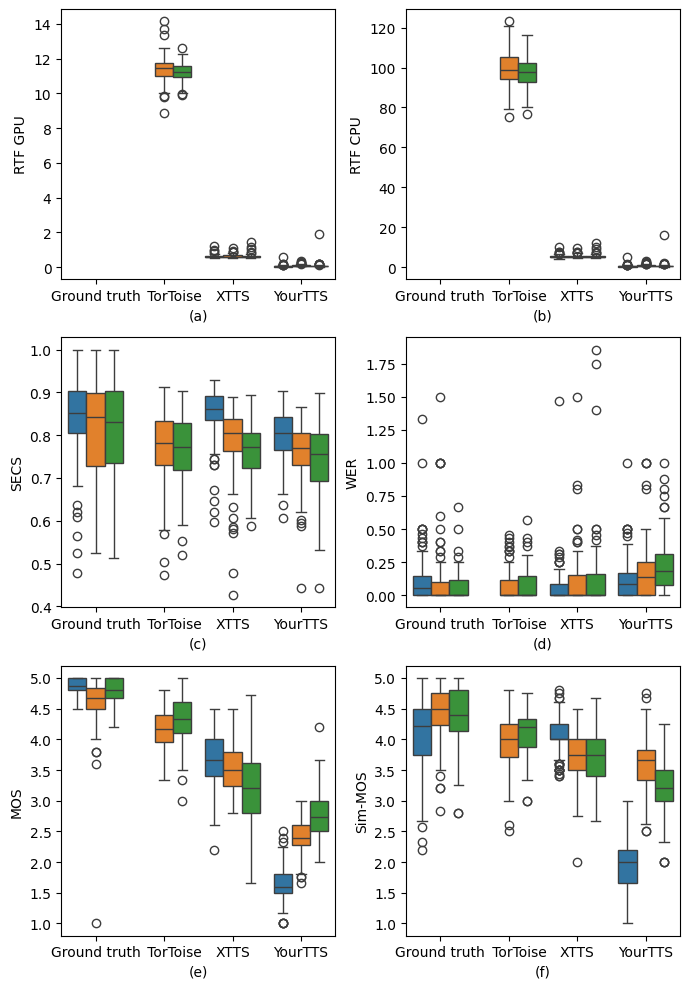

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']
subfigures_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

# Remove record whose input text is incorrect because it affects the distribution of the WER
metadata_df = metadata_df.drop(866).reset_index(drop=True)

# Create a 3 x 2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(7, 10))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over metrics and axes to plot each metric on its corresponding subplot
i = 0
for metric, ax in zip(metrics_list, axes):
    sns.boxplot(data=metadata_df, x="Model", y=metric, hue="Dataset", order=['Ground truth', 'TorToise', 'XTTS', 'YourTTS'], ax=ax, legend=False)
    ax.set_xticks(np.arange(4), ['Ground truth', '      TorToise ', 'XTTS', 'YourTTS'])
    ax.set_xlabel(subfigures_list[i])
    i += 1

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()
plt.show()


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'Sim-MOS']

# # Remove record whose input text is incorrect because it affects the distribution of the WER
# metadata_df = metadata_df.drop(866).reset_index(drop=True)

# for metric in metrics_list:

#   plt.figure()
#   sns.boxplot(data=metadata_df, x="Model", y=metric, hue="Dataset", order=['Ground truth', 'TorToise', 'XTTS', 'YourTTS'])
#   plt.show()

# Possible correlation: metric vs ref audio length
Estas visualizaciones no parecen las más adecuadas. Preguntar a chatGPT qué test estadístico o visualización hacer para saber si la duración y la métrica están correlacionadas.

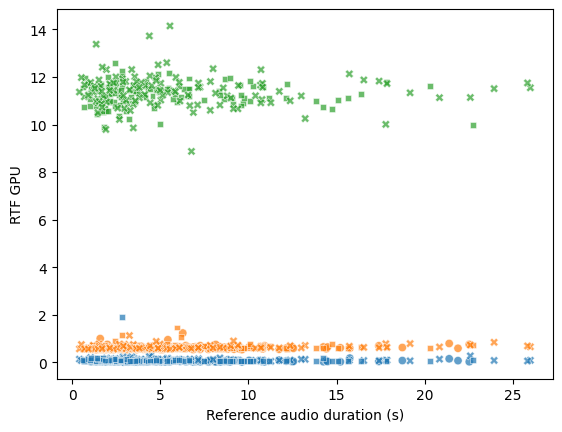

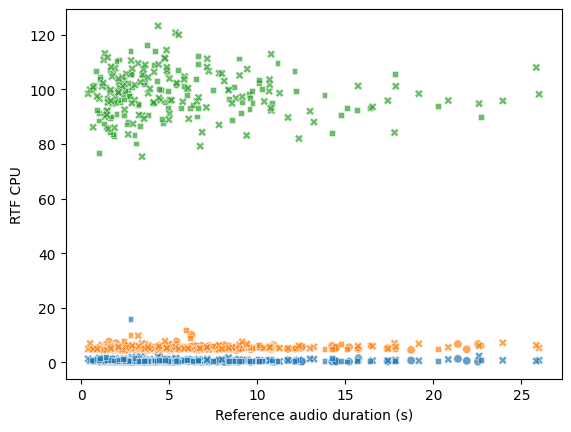

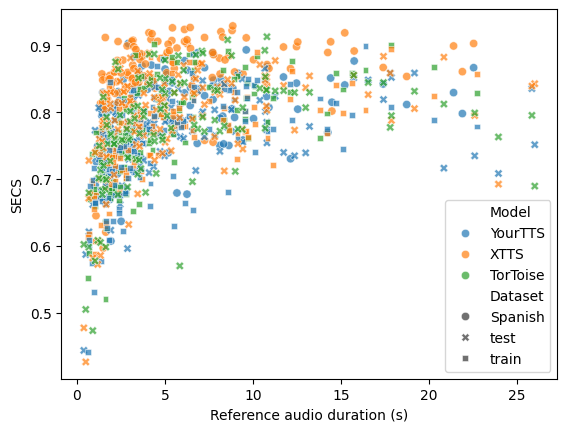

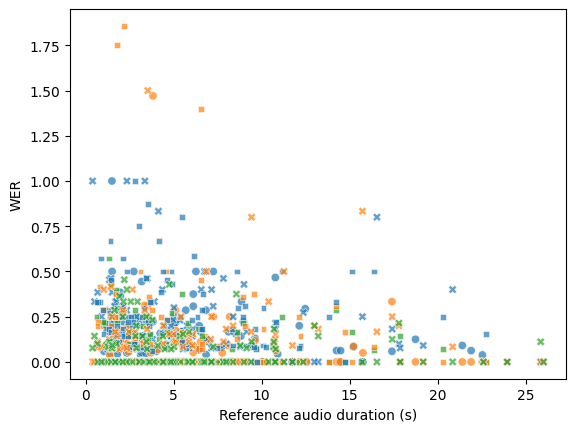

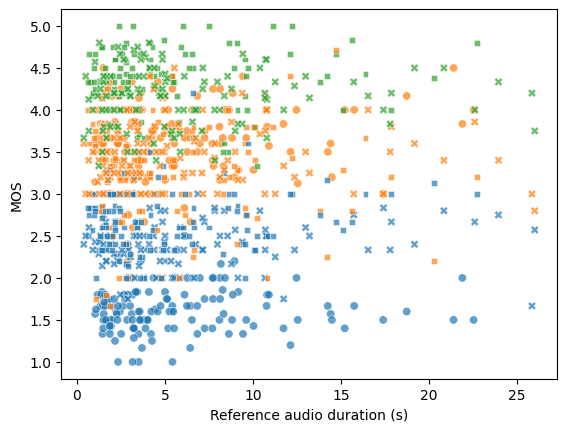

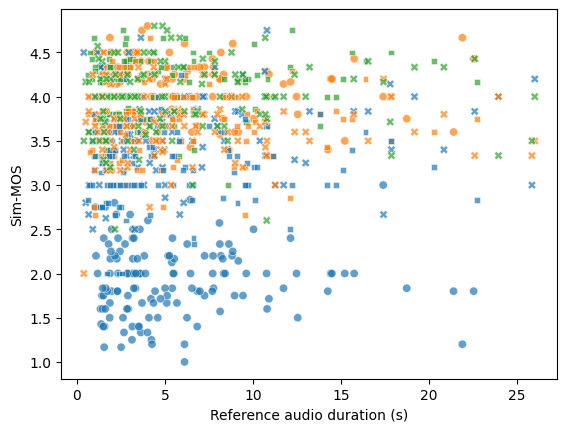

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metadata_df_fake_audios = metadata_df[metadata_df['Model'] != 'Ground truth']

# Remove audio with excessive duration because it can affect the analysis
metadata_df_fake_audios = metadata_df_fake_audios.drop([243, 106])

for metric in metrics_list:
  if metric == 'SECS':
    legend = True
  else:
    legend = False

  plt.figure()
  sns.scatterplot(x='Duration reference audio', y=metric, hue='Model', style='Dataset', alpha=0.7, data=metadata_df_fake_audios, legend=legend)
  plt.xlabel('Reference audio duration (s)')
  plt.ylabel(metric)
  plt.show()

# Heatmap
Create a heatmap of correlation coefficients between the duration of the reference audio and all metrics. This will provide a visual summary of the correlations between variables.

## Without separating per dataset

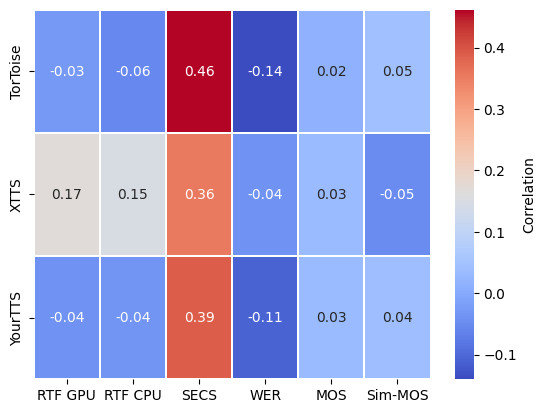

pearson


In [ ]:
columns_list = ['Model', 'Duration reference audio'] + metrics_list
metadata_df_ok = metadata_df[metadata_df['Model'] != 'Ground truth']
metadata_df_ok = metadata_df_ok.drop([243, 106])
correlation_by_model = metadata_df_ok[columns_list].groupby('Model').apply(lambda x: x.corr(method='pearson', numeric_only=True)['Duration reference audio'])
correlation_by_model = correlation_by_model.reset_index().drop(correlation_by_model.columns[0], axis=1).set_index('Model')

plt.figure()
ax = sns.heatmap(correlation_by_model, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.1, cbar_kws={'label': 'Correlation'})
ax.set(xlabel="", ylabel="")
# plt.title('Without separating per dataset')
plt.show()
print('pearson')

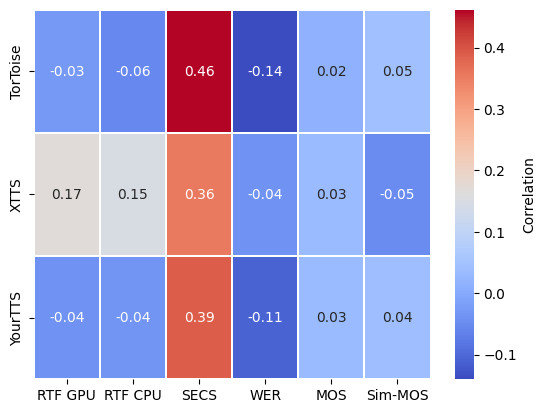

pearson


In [ ]:
columns_list = ['Model', 'Duration reference audio'] + metrics_list
metadata_df_fake_audios = metadata_df[metadata_df['Model'] != 'Ground truth']
metadata_df_fake_audios = metadata_df_fake_audios.drop([243, 106])
correlation_by_model = metadata_df_fake_audios[columns_list].groupby('Model').apply(lambda x: x.corr(method='pearson', numeric_only=True)['Duration reference audio'])
correlation_by_model = correlation_by_model.reset_index().drop(correlation_by_model.columns[0], axis=1).set_index('Model')

plt.figure()
ax = sns.heatmap(correlation_by_model, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.1, cbar_kws={'label': 'Correlation'})
ax.set(xlabel="", ylabel="")
# plt.title('Without separating per dataset')
plt.show()
print('pearson')

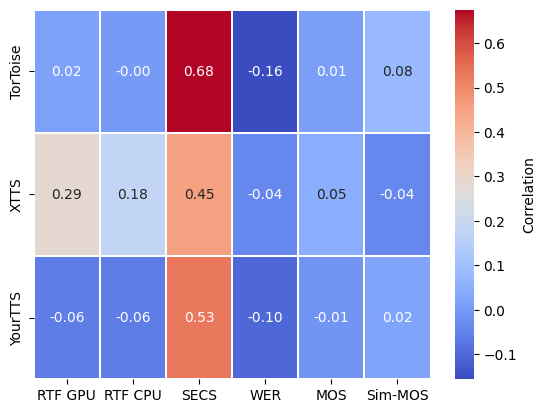

spearman


In [ ]:
columns_list = ['Model', 'Duration reference audio'] + metrics_list
metadata_df_fake_audios = metadata_df[metadata_df['Model'] != 'Ground truth']
metadata_df_fake_audios = metadata_df_fake_audios.drop([243, 106])
correlation_by_model = metadata_df_fake_audios[columns_list].groupby('Model').apply(lambda x: x.corr(method='spearman', numeric_only=True)['Duration reference audio'])
correlation_by_model = correlation_by_model.reset_index().drop(correlation_by_model.columns[0], axis=1).set_index('Model')

plt.figure()
ax = sns.heatmap(correlation_by_model, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.1, cbar_kws={'label': 'Correlation'})
ax.set(xlabel="", ylabel="")
# plt.title('Without separating per dataset')
plt.show()
print('spearman')

# One heatmap per dataset

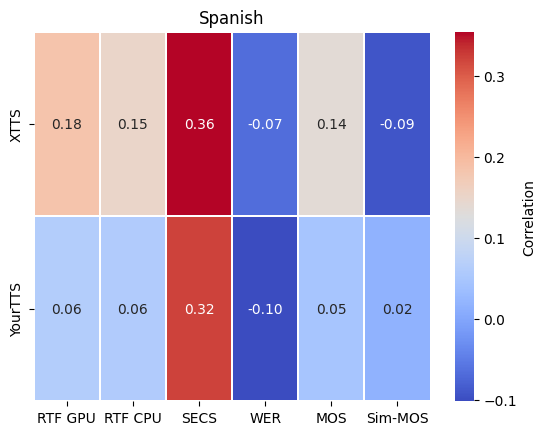

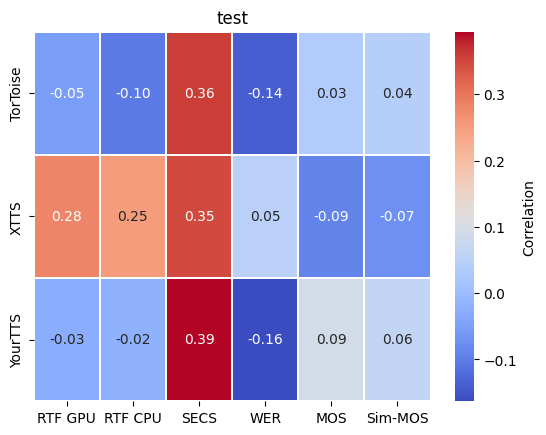

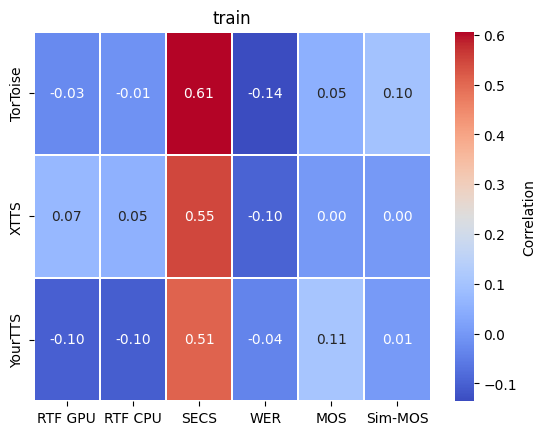

pearson


In [ ]:
columns_list = ['Model', 'Duration reference audio'] + metrics_list
metadata_df_fake_audios = metadata_df[metadata_df['Model'] != 'Ground truth']
metadata_df_fake_audios = metadata_df_fake_audios.drop([243, 106])

for dataset in metadata_df_fake_audios['Dataset'].unique():

  metadata_df_fake_audios_dataset = metadata_df_fake_audios[metadata_df_fake_audios['Dataset'] == dataset]
  correlation_by_model = metadata_df_fake_audios_dataset[columns_list].groupby('Model').apply(lambda x: x.corr(method='pearson', numeric_only=True)['Duration reference audio'])
  correlation_by_model = correlation_by_model.reset_index().drop(correlation_by_model.columns[0], axis=1).set_index('Model')

  plt.figure()
  ax = sns.heatmap(correlation_by_model, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.1, cbar_kws={'label': 'Correlation'})
  ax.set(xlabel="", ylabel="")
  plt.title(dataset)
  plt.show()

print('pearson')

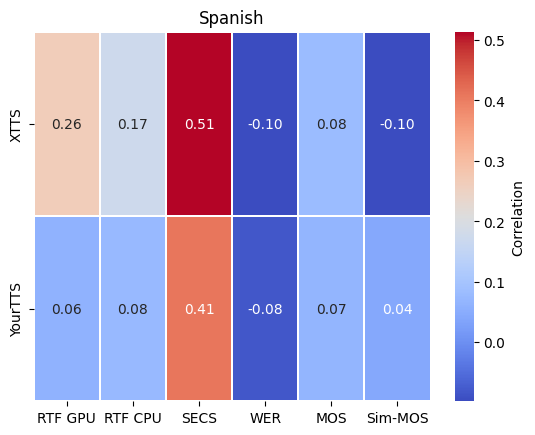

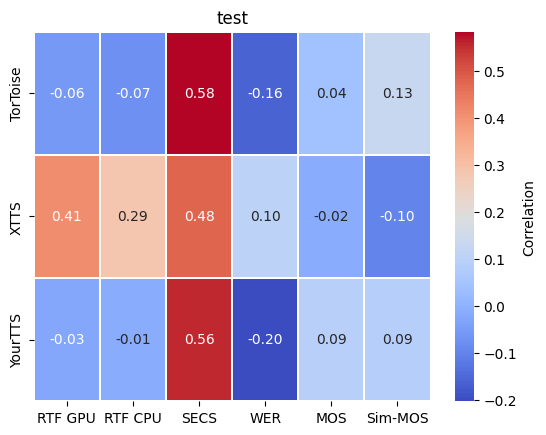

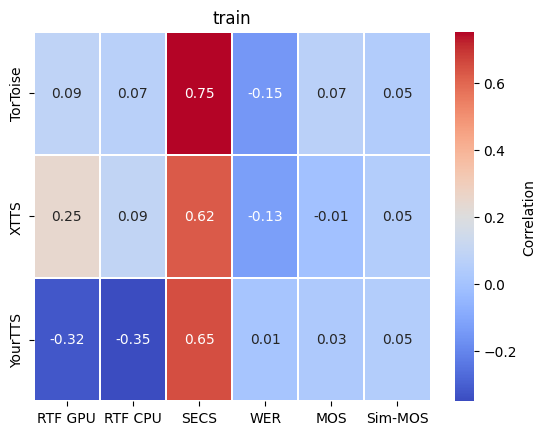

spearman


In [ ]:
columns_list = ['Model', 'Duration reference audio'] + metrics_list
metadata_df_fake_audios = metadata_df[metadata_df['Model'] != 'Ground truth']
metadata_df_fake_audios = metadata_df_fake_audios.drop([243, 106])

for dataset in metadata_df_fake_audios['Dataset'].unique():

  metadata_df_fake_audios_dataset = metadata_df_fake_audios[metadata_df_fake_audios['Dataset'] == dataset]
  correlation_by_model = metadata_df_fake_audios_dataset[columns_list].groupby('Model').apply(lambda x: x.corr(method='spearman', numeric_only=True)['Duration reference audio'])
  correlation_by_model = correlation_by_model.reset_index().drop(correlation_by_model.columns[0], axis=1).set_index('Model')

  plt.figure()
  ax = sns.heatmap(correlation_by_model, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.1, cbar_kws={'label': 'Correlation'})
  ax.set(xlabel="", ylabel="")
  plt.title(dataset)
  plt.show()

print('spearman')

# Check cpu and gpu

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.220
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.44
clflush size	: 64
cache_alignment	: 64
addres

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Recalculate results table without outliers!

In [ ]:
import pandas as pd
metadata_df = pd.read_csv('ALL_METADATA_TTS.csv')

# Remove record whose input text is incorrect because it affects the distribution of the WER
metadata_df = metadata_df.drop(866).reset_index(drop=True)

In [ ]:
import random

for index, row in metadata_df_real_audios.iterrows():
  audio_path = row['Audio path']
  directory = os.path.join('audios_prepared', row['Dataset'], row['Speaker ID'])
  reference_audio_path = os.path.join(directory, random.choice(os.listdir(directory)))

  audio_fpath = Path(audio_path)
  audio_wav = preprocess_wav(audio_fpath)
  audio_embed = encoder.embed_utterance(audio_wav)

  reference_audio_fpath = Path(reference_audio_path)
  reference_audio_wav = preprocess_wav(reference_audio_fpath)
  reference_audio_embed = encoder.embed_utterance(reference_audio_wav)

  SECS =  audio_embed @ reference_audio_embed

  metadata_df.loc[index, 'SECS'] = SECS

In [ ]:
import re

columns = metadata_df.columns
pattern = re.compile(r'Evaluator \d+ OS')
os_columns = [column for column in columns if pattern.search(column)]
metadata_df['MOS'] = metadata_df[os_columns].mean(axis=1)

columns = metadata_df.columns
pattern = re.compile(r'Evaluator \d+ Sim-OS')
os_columns = [column for column in columns if pattern.search(column)]
metadata_df['Sim-MOS'] = metadata_df[os_columns].mean(axis=1)

In [ ]:
metrics_list = ['RTF GPU', 'RTF CPU', 'SECS', 'WER', 'MOS', 'MOSNet', 'Sim-MOS']
datasets_list = metadata_df['Dataset'].unique()
models_list = metadata_df['Model'].unique()

results_df_cleaned = pd.DataFrame({'Model': ['Ground truth', 'Ground truth', 'Ground truth',
                                    'TorToise', 'TorToise',
                                    'XTTS', 'XTTS', 'XTTS',
                                    'YourTTS', 'YourTTS', 'YourTTS'],
                          'Dataset': ['Spanish', 'test', 'train',
                                      'test', 'train',
                                      'Spanish', 'test', 'train',
                                      'Spanish', 'test', 'train'],
                          'RTF GPU': 11*[np.nan],
                           'RTF CPU': 11*[np.nan],
                                   'SECS': 11*[np.nan],
                                   'WER': 11*[np.nan],
                                   'MOS': 11*[np.nan],
                                   'MOSNet': 11*[np.nan],
                                   'Sim-MOS': 11*[np.nan],
                                  #  'n': 11*[np.nan],
                                  #  'n_cleaned': 11*[np.nan],
                                  #  'n_cleaned2': 11*[np.nan]
                           })

for metric in metrics_list:
  for dataset in datasets_list:
    for model in models_list:
      try:
        data = metadata_df[(metadata_df['Dataset'] == dataset) & (metadata_df['Model'] == model)][metric]
        data = data.dropna()

        q1 = np.percentile(data, 25)
        q3 = np.percentile(data, 75)
        iqr = q3 - q1

        outlier_threshold = 1.5 * iqr

        outliers = (data < q1 - outlier_threshold) | (data > q3 + outlier_threshold)
        cleaned_data = data[~outliers]

        mean = cleaned_data.mean()
        n_cleaned = cleaned_data.count()
        error = cleaned_data.std() / np.sqrt(n_cleaned)

        index = results_df_cleaned[(results_df_cleaned['Model'] == model) & (results_df_cleaned['Dataset'] == dataset)].index[0]
        results_df_cleaned.iloc[index, results_df_cleaned.columns.get_loc(metric)] = str(round(mean, 3)) + ' +- ' + str(round(error, 3))
        # results_df_cleaned.iloc[index, results_df_cleaned.columns.get_loc('n')] = len(data)
        # results_df_cleaned.iloc[index, results_df_cleaned.columns.get_loc('n_cleaned')] = len(cleaned_data)
        # results_df_cleaned.iloc[index, results_df_cleaned.columns.get_loc('n_cleaned2')] = n_cleaned

      except:
        pass

results_df_cleaned

,Model,Dataset,RTF GPU,RTF CPU,SECS,WER,MOS,MOSNet,Sim-MOS
0,Ground truth,Spanish,NaN,NaN,0.845 +- 0.006,0.066 +- 0.007,4.876 +- 0.012,3.426 +- 0.043,4.143 +- 0.049
1,Ground truth,test,NaN,NaN,0.835 +- 0.009,0.039 +- 0.006,4.671 +- 0.025,3.741 +- 0.047,4.483 +- 0.034
2,Ground truth,train,NaN,NaN,0.823 +- 0.01,0.052 +- 0.007,4.782 +- 0.017,3.421 +- 0.051,4.422 +- 0.04
3,TorToise,test,11.402 +- 0.047,99.137 +- 0.758,0.78 +- 0.007,0.046 +- 0.006,4.144 +- 0.031,3.644 +- 0.043,3.994 +- 0.035
4,TorToise,train,11.257 +- 0.04,97.826 +- 0.68,0.775 +- 0.007,0.068 +- 0.009,4.342 +- 0.033,3.478 +- 0.044,4.121 +- 0.03
5,XTTS,Spanish,0.606 +- 0.004,5.215 +- 0.04,0.864 +- 0.003,0.032 +- 0.005,3.646 +- 0.034,3.332 +- 0.047,4.134 +- 0.02
6,XTTS,test,0.626 +- 0.006,5.4 +- 0.053,0.802 +- 0.005,0.068 +- 0.008,3.516 +- 0.035,3.356 +- 0.044,3.732 +- 0.031
7,XTTS,train,0.619 +- 0.005,5.307 +- 0.047,0.766 +- 0.006,0.073 +- 0.01,3.203 +- 0.055,3.322 +- 0.047,3.694 +- 0.036
8,YourTTS,Spanish,0.044 +- 0.002,0.38 +- 0.014,0.801 +- 0.005,0.093 +- 0.008,1.633 +- 0.02,3.247 +- 0.028,1.924 +- 0.034
9,YourTTS,test,0.095 +- 0.003,0.797 +- 0.025,0.768 +- 0.005,0.146 +- 0.013,2.423 +- 0.023,3.48 +- 0.048,3.616 +- 0.04
